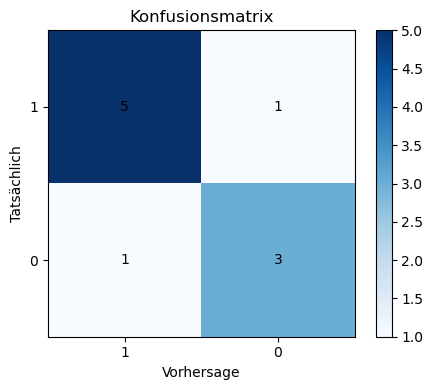

Konfusionsmatrix:
TP: 5, FN: 1
FP: 1, TN: 3

Metriken:
Genauigkeit (Accuracy) : 0.800
Erinnerung (Recall)    : 0.833
Praezision (Precision) : 0.833
F1 Score               : 0.833

Manuelle große Werte:
Konfusionsmatrix:
TP: 5, FN: 5
FP: 90, TN: 900

Metriken:
Genauigkeit (Accuracy) : 0.905
Erinnerung (Recall)    : 0.500
Praezision (Precision) : 0.053
F1 Score               : 0.095


In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

##########################
# 1. Wahre Werte und Vorhersagewahrscheinlichkeiten
##########################
y_wahr = [1,1,1,1,1,1,0,0,0,0]        # Tatsächliche Klassen
y_vorhersage_proba = [0.7,0.8,0.65,0.9,0.45,0.5,0.55,0.35,0.4,0.25]  # Modell-Wahrscheinlichkeiten

# Schwellenwert für Klassifizierung
schwelle = 0.5
y_vorhersage = [1 if p >= schwelle else 0 for p in y_vorhersage_proba]  # 1 = Betrug, 0 = Kein Betrug

##########################
# 2. Confusionsmatrix berechnen
##########################
cm = confusion_matrix(y_wahr, y_vorhersage, labels=[1,0])

# TP, FN, FP, TN
TP, FN, FP, TN = cm[0,0], cm[0,1], cm[1,0], cm[1,1]

# Metriken berechnen
genauigkeit  = (TP + TN) / (TP + TN + FP + FN)
erinnerung   = TP / (TP + FN) if (TP+FN) else 0
praezision   = TP / (TP + FP) if (TP+FP) else 0
f1_score     = 2 * praezision * erinnerung / (praezision + erinnerung) if (praezision+erinnerung) else 0

##########################
# 3. Confusionsmatrix visualisieren
##########################
fig, ax = plt.subplots(figsize=(5,4))
im = ax.imshow(cm, cmap="Blues")

ax.set_title("Konfusionsmatrix")
ax.set_xlabel("Vorhersage")
ax.set_ylabel("Tatsächlich")
ax.set_xticks([0,1])
ax.set_yticks([0,1])
ax.set_xticklabels(["1", "0"])
ax.set_yticklabels(["1", "0"])

for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(j, i, str(cm[i, j]), ha="center", va="center", color="black")

plt.colorbar(im)
plt.tight_layout()
plt.show()

##########################
# 4. Ergebnisse ausgeben
##########################
print("Konfusionsmatrix:")
print(f"TP: {TP}, FN: {FN}")
print(f"FP: {FP}, TN: {TN}\n")

print("Metriken:")
print(f"Genauigkeit (Accuracy) : {genauigkeit:.3f}")
print(f"Erinnerung (Recall)    : {erinnerung:.3f}")
print(f"Praezision (Precision) : {praezision:.3f}")
print(f"F1 Score               : {f1_score:.3f}")

##########################
# 5. Beispiel große Datenwerte (manuell)
##########################
# Confusion Matrix Werte
TP = 5    # Richtiger Positiv (Gericht Fraud richtig)
FN = 5    # Falsch Negativ (Gericht Fraud falsch)
FP = 90   # Falsch Positiv (Gericht Non-Fraud falsch)
TN = 900  # Richtiger Negativ (Gericht Non-Fraud richtig)

genauigkeit  = (TP + TN) / (TP + TN + FP + FN)
erinnerung   = TP / (TP + FN) if (TP+FN) != 0 else 0
praezision   = TP / (TP + FP) if (TP+FP) != 0 else 0
f1_score     = 2 * praezision * erinnerung / (praezision + erinnerung) if (praezision + erinnerung) != 0 else 0

print("\nManuelle große Werte:")
print("Konfusionsmatrix:")
print(f"TP: {TP}, FN: {FN}")
print(f"FP: {FP}, TN: {TN}\n")

print("Metriken:")
print(f"Genauigkeit (Accuracy) : {genauigkeit:.3f}")
print(f"Erinnerung (Recall)    : {erinnerung:.3f}")
print(f"Praezision (Precision) : {praezision:.3f}")
print(f"F1 Score               : {f1_score:.3f}")
